In [383]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.ar_model as ar
import torch
torch.set_default_dtype(torch.double)
import sigkernel

In [384]:
import scipy.stats as stats

In [385]:
from tqdm import tqdm

In [386]:
from itertools import product

In [387]:
import matplotlib.pyplot as plt

In [388]:
RNG = np.random.default_rng(1234)

In [389]:
N = 10000
M = 100

In [390]:
def gen_ar_processes(n, corr, a = 0.8):
    z = torch.tensor(RNG.multivariate_normal([0, 0] , [[1, corr], [corr, 1]], n))
    x = torch.zeros(2, n)
    x[:, 0] = z[0, :]
    a = 0.8
    for i, zi in enumerate(z[1:, :]):
        x[:, i+1] = a*x[:, i] + zi 
        
    return x

In [391]:
def gen_short_samples_burn_in(corr = 0):
    x_short_samples = torch.zeros(M, N, 2)
    for i in range(M):
        process = gen_ar_processes(10000+N, corr)
        x_short_samples[i, :, :] = process[:, 10000:].T
    return x_short_samples

In [406]:
samples = gen_short_samples_burn_in(0.2)

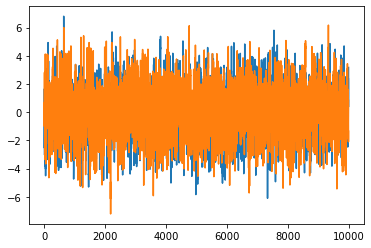

In [407]:
plt.plot(samples[0, :, 0])
plt.plot(samples[0, :, 1])

In [408]:
autocorr_est = torch.zeros(M, 200, 2)

for i in range(200):
    autocorr_est[:, i, :] = (samples[:, i:, :] * samples[:, :N-i, :]).mean(axis = 1)

In [409]:
n = np.array([float(i) for i in range(200)])
g_h = 0.8**n/(1-0.8**2)

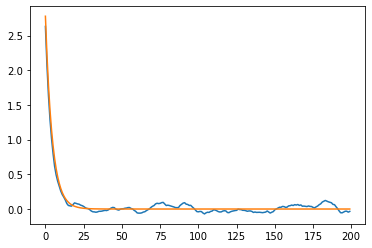

In [410]:
plt.plot(autocorr_est[0, :200, 0])
plt.plot(g_h[:200])

In [412]:
prod_autocorr_est = autocorr_est[:, :, 0] * autocorr_est[:, :, 1]

In [413]:
asymptotic_variance = (prod_autocorr_est.sum(axis = 1) + prod_autocorr_est[:, 1:].sum(axis = 1))/N
asymptotic_std = torch.sqrt(asymptotic_variance)

In [414]:
print(asymptotic_std)

tensor([0.0585, 0.0594, 0.0596, 0.0625, 0.0586, 0.0580, 0.0602, 0.0584, 0.0557,
        0.0611, 0.0579, 0.0551, 0.0595, 0.0613, 0.0606, 0.0608, 0.0602, 0.0562,
        0.0618, 0.0591, 0.0604, 0.0580, 0.0599, 0.0619, 0.0604, 0.0615, 0.0610,
        0.0599, 0.0596, 0.0635, 0.0602, 0.0574, 0.0546, 0.0591, 0.0614, 0.0625,
        0.0585, 0.0613, 0.0607, 0.0600, 0.0574, 0.0628, 0.0595, 0.0558, 0.0629,
        0.0597, 0.0601, 0.0624, 0.0611, 0.0571, 0.0607, 0.0584, 0.0629, 0.0574,
        0.0627, 0.0615, 0.0578, 0.0602, 0.0601, 0.0619, 0.0594, 0.0587, 0.0602,
        0.0562, 0.0628, 0.0587, 0.0607, 0.0607, 0.0603, 0.0571, 0.0568, 0.0598,
        0.0603, 0.0617, 0.0595, 0.0602, 0.0598, 0.0584, 0.0595, 0.0558, 0.0612,
        0.0627, 0.0596, 0.0553, 0.0577, 0.0589, 0.0557, 0.0593, 0.0567, 0.0604,
        0.0558, 0.0585, 0.0615, 0.0587, 0.0607, 0.0586, 0.0601, 0.0615, 0.0608,
        0.0589])


In [415]:
c_est = torch.zeros(M, 200)

for i in range(200):
    c_est[:, i] = (samples[:, i:, 0] * samples[:, :N-i, 1]).mean(axis = 1)

In [416]:
(torch.abs(c_est[:, 0]) > asymptotic_std*2).sum()/(M)

tensor(1.)

In [417]:
null_dist = stats.norm(0, asymptotic_std.mean())
x = np.linspace(-1, 1, 100)
density = null_dist.pdf(x)

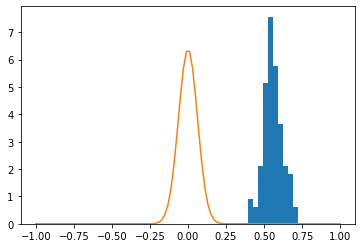

In [418]:
plt.hist([i.item() for i in c_est[:, 0]], density = True)
plt.plot(x, NULL.pdf(x))

In [420]:
null_dist.cdf(0.25)

0.9999864289820651

In [421]:
c_est.max()

tensor(0.7219)

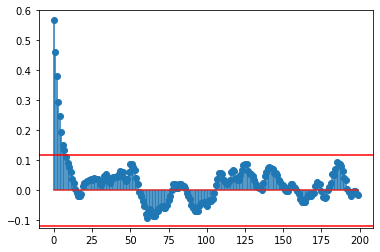

In [419]:
fig, ax = plt.subplots()
ax.stem(c_est[0, :])
ax.axhline(asymptotic_std.mean()*2, color = 'red')
ax.axhline(-asymptotic_std.mean()*2, color = 'red')